In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

#  Image Properties

A digital image is denoted by a two dimensional function $f(x,y) = c$

x, y are referred to as image coordinates. 

Let us assume an image with column coordinate x: $0 \le x \le N_c - 1$ 
and row coordinate y: $0 \le y \le N_r - 1$

The image has then $N_p = N_c \cdot N_r$ pixels.

By convention the coordinate tuple $(y=0, x=0)$ represents the upper left corner of the image. This convention is also used by matplotlib function **imshow**.

Accordingly the lower right corner of the image is reprented by coordinate tuple $(y=N_r -1, x=N_c - 1)$ 


The image below shows the image coordinates ...

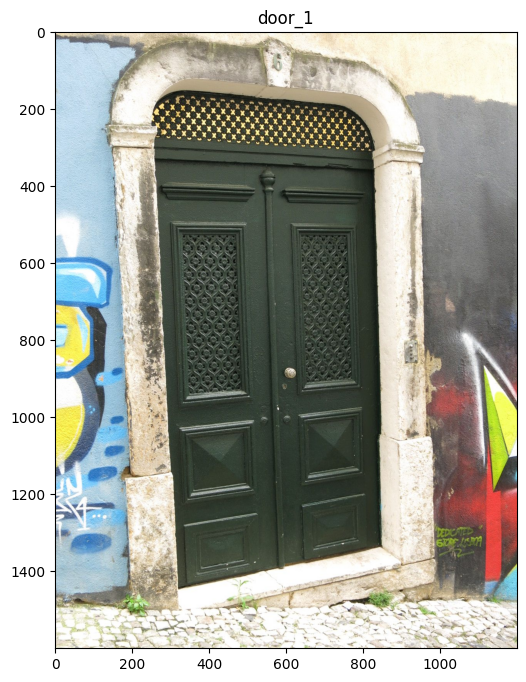

In [2]:
imgFile_door = "./img/door_1_lisboa.jpg"
# load as rgb (reordering colors as rgb since opencv output in bgr order !)
img_door = cv2.imread(imgFile_door)[:,:,[2,1,0]]
fig10 = plt.figure(10, figsize=[12, 8])
ax_f10 = fig10.add_subplot(1, 1, 1)
ax_f10.imshow(img_door)
ax_f10.set_title('door_1');

#  The *discrete* 2D Fourier Transform (DFT) 


The DFT of an image is then defined by equation:

$$
F(u,v) = \frac{1}{N_c \cdot N_r} \sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1}f(x,y) \cdot exp \left[ -j2\pi \cdot \left(\frac{x\cdot u}{N_c} + \frac{y\cdot v}{N_r}  \right) \right]
$$

or

$$
F(u,v) = \frac{1}{N_c \cdot N_r} \sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1}f(x,y) \cdot exp \left[ -j2\pi \cdot \frac{x\cdot u}{N_c} \right] \cdot exp \left[ -j2\pi \cdot \frac{y\cdot v}{N_r} \right]
$$

Properties of DFT $f(u,v)$:

$F(u,v)$ is periodic with period $N_c$ for variable $u$ and period $N_r$ for variable $v$.

Hence $F(u+m\cdot N_c, v+k\cdot N_r) = F(u,v)$ with $m$ and $k$ being arbitrary integer values.

# Inversion of discrete 2D Fourier Transform

Having $F(u,v)$ for frequency variable u: $0 \le u \le N_c - 1$ and frequency variable v: $0 \le v \le N_r - 1$ it is possible
to recover the image $fx,y)$ via the inverse discrete 2D Fourier transform (IDFT):

Here is the definition of the inverse 2D DFT:

$$IDFT = \sum_{u=0}^{N_c - 1}\sum_{v=0}^{N_r - 1}F(u,v) \cdot exp \left[ j2\pi \cdot \frac{x_h \cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{y_h \cdot v}{N_r} \right]
$$

To show that this formula indeed transforms $F(u,v)$ back to the image $f(x,y)$ we insert the equation for $F(u,v)$ into the inversion formula.

$$IDFT = \frac{1}{N_c \cdot N_r} \sum_{u=0}^{N_c - 1}\sum_{v=0}^{N_r - 1}\sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1}f(x,y) \cdot  exp \left[ j2\pi \cdot \frac{\left(x_h - x\right) \cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{\left(y_h - y\right)\cdot v}{N_r} \right]
$$


$$IDFT = \frac{1}{N_c \cdot N_r} \sum_{u=0}^{N_c - 1}\sum_{v=0}^{N_r - 1}\sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1}f(x,y) \cdot  exp \left[ j2\pi \cdot \frac{\left(x_h - x\right) \cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{\left(y_h - y\right)\cdot v}{N_r} \right]
$$

rearrangement of the summation yields

$$IDFT = \frac{1}{N_c \cdot N_r} \sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1} f(x,y) \left( \sum_{u=0}^{N_c - 1}\sum_{v=0}^{N_r - 1} \cdot  exp \left[ j2\pi \cdot \frac{\left(x_h - x\right) \cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{\left(y_h - y\right)\cdot v}{N_r} \right] \right)
$$

and observing that expression 

$$
\sum_{u=0}^{N_c - 1}\sum_{v=0}^{N_r - 1} \cdot  exp \left[ j2\pi \cdot \frac{\left(x_h - x\right) \cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{\left(y_h - y\right)\cdot v}{N_r} \right] = \begin{cases}{N_c \cdot N_r} & x=x_h , y=y_h\\ 0 & otherwise\end{cases}
$$

only differs from $0$ if conditions $x=x_h$ **and** $y=y_h$ hold it follows

$$IDFT = \frac{1}{N_c \cdot N_r} \cdot f(x_h,y_h) \cdot {N_c \cdot N_r} = f(x_h,y_h)
$$

# Other properties

Some of the frequenctly used properties are listed below:

## mean value

From the definition of the discrete 2D Fourier transform it follows that the mean value of the image equals the DFT at frequencies $u=0$ and $v=0$:

$$
F(u=0,v=0) = \frac{1}{N_c \cdot N_r} \sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1}f(x,y) 
$$

## symmetry

Since image $f(x,y)$ is real-valued, the following condition can be derived:

$$
F(-u,-v) = \frac{1}{N_c \cdot N_r} \sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1}f(x,y) \cdot exp \left[ j2\pi \cdot \frac{x\cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{y\cdot v}{N_r} \right] = F(u, v)^*
$$

## Parseval's theorem

We compute $|F(u,v)|^2$ from the expression $F(u,v) \cdot F(u,v)^*$:


Starting with the equation

$$\frac{1}{N_c \cdot N_r}\sum_{x=0}^{N_c-1}\sum_{y=0}^{N_r-1}|f(x,y)|^2 = \frac{1}{N_c \cdot N_r}\sum_{x=0}^{N_c-1}\sum_{y=0}^{N_r-1}f(x,y) \cdot f(x,y)$$

and expressing $f(x,y)$ by its *inverse* Fourier transform (and exploiting that $f(x,y)$ is real-valued:

$$
f(x,y) = \sum_{u=0}^{N_c - 1}\sum_{v=0}^{N_r - 1}F(u,v) \cdot exp \left[ j2\pi \cdot \frac{x \cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{y \cdot v}{N_r} \right]
$$

inserting yields

$$
\frac{1}{N_c \cdot N_r}\sum_{x=0}^{N_c-1}\sum_{y=0}^{N_r-1}f(x,y) \cdot \sum_{u=0}^{N_c - 1}\sum_{v=0}^{N_r - 1}F(u,v) \cdot exp \left[ j2\pi \cdot \frac{x \cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{y \cdot v}{N_r} \right]
$$

Next the order of summation is rearranged:

$$
\frac{1}{N_c \cdot N_r}\sum_{u=0}^{N_c-1}\sum_{v=0}^{N_r-1} \sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1}F(u,v) \cdot f(x,y) \cdot exp \left[ j2\pi \cdot \frac{x \cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{y \cdot v}{N_r} \right]
$$

furtermore using

$$
F(u,v)^*=\frac{1}{N_c \cdot N_r} \sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1} f(x,y) \cdot exp \left[ j2\pi \cdot \frac{x \cdot u}{N_c} \right] \cdot exp \left[ j2\pi \cdot \frac{y \cdot v}{N_r} \right]
$$

we finally get Parseval's theorem for images:

$$
\frac{1}{N_c \cdot N_r}\sum_{x=0}^{N_c-1}\sum_{y=0}^{N_r-1}|f(x,y)|^2 = \sum_{u=0}^{N_c-1}\sum_{v=0}^{N_r-1} |F(u,v)|^2
$$

Sometimes this equation is referred to as *energy theorem*

## Trying to interprete the inverse discrete Fourier transfom

The image function $f(x,y)$ and the frequency function $F(u,v)$ are a transform pair.


$$f(x,y) = \sum_{u=0}^{N_c - 1}\sum_{v=0}^{N_r - 1}F(u,v) \cdot exp \left[ j2\pi \cdot \left( \frac{x \cdot u}{N_c} + \frac{y \cdot v}{N_r} \right) \right]
$$

$f(x,y)$ can be interpreted as the weigted addition of basis functions $W(x,y, u,v, N_c, N_r)$.

$$
W(x,y, u,v, N_c, N_r) = exp \left[ j2\pi \cdot \left( \frac{x \cdot u}{N_c} + \frac{y \cdot v}{N_r} \right) \right]
$$

with $F(u,v)$ being the weighting factors.

The phase $\varphi$ of basis function $W()$ is then:

$$
\varphi(x,y, u,v, N_c, N_r) = 2\pi \cdot \left( \frac{x \cdot u}{N_c} + \frac{y \cdot v}{N_r} \right)
$$

Accordingly the basis function can be reformulated as:

$$
W(x,y, u,v, N_c, N_r) = exp \left[ j \cdot \varphi(x,y, u,v, N_c, N_r) \right] = cos\left[\varphi(x,y, u,v, N_c, N_r) \right] + j \cdot sin\left[\varphi(x,y, u,v, N_c, N_r) \right] 
$$

It is interesting to study the expression for a constant phase $2\pi \cdot r$ (modulo $2  \pi$). Value $r$ shall be in the range  $0 \le r \lt 1$.

$$
\varphi(x,y, u,v, N_c, N_r) = 2\pi \cdot r + m \cdot 2\pi = 2\pi \cdot \left( \frac{x \cdot u}{N_c} + \frac{y \cdot v}{N_r} \right)
$$

$$
2\pi \cdot r + m \cdot 2\pi = 2\pi \cdot \left( \frac{x \cdot u}{N_c} + \frac{y \cdot v}{N_r} \right)
$$

$$
r + m = \frac{x \cdot u}{N_c} + \frac{y \cdot v}{N_r}
$$

Solving for $y$ yields:

$$
y = - x \cdot \left( \frac{u}{v}\right) \cdot \left(\frac{N_r}{N_c} \right) + \left(r+ m \right) \cdot \left(\frac{N_r}{v}\right)
$$

For given and fixed frequency values $u$ and $v$ and a constant value of $r$ the equation describes straight lines with a *constant slope* of $\left( \frac{u}{v}\right) \cdot \left(\frac{N_r}{N_c} \right)$ and axis-offsets $\left(r+ m \right) \cdot \left(\frac{N_r}{v}\right)$.

## Visualisation of the basis function W()

We intend to visualize the *real part* of basis function $W(x,y, u,v, N_c, N_r)$ for $0 \le x \lt N_r$ and $0 \le y \lt N_r$ for some fixed frequency pairs $(u, v)$.

The real part is shown here:

$$
Re\{W(x,y, u,v, N_c, N_r)\} = cos\left[\varphi(x,y, u,v, N_c, N_r) \right] = cos\left[2\pi \cdot \left( \frac{x \cdot u}{N_c} + \frac{y \cdot v}{N_r} \right) \right]
$$

For visualisation purposes the real part is modified into a function $P(x,y, u,v, N_c, N_r)$ that can be displayed as an image.

$$
P(x,y, u,v, N_c, N_r) = A \cdot \frac{1}{2} \cdot \left( 1 - cos\left[2\pi \cdot \left( \frac{x \cdot u}{N_c} + \frac{y \cdot v}{N_r} \right) \right] \right)
$$

Phase values which are multiples of $m \cdot 2\pi$ (m : integer) are mapped to a value of $0$. Phases of $\pi + m \cdot 2\pi$ are mapped to value of $A \gt 0$. Depending on the phase, function $P(x,y, u,v, N_c, N_r)$ varies in the range $\left[0, A\right]$. When the function is displayed as an image in the $(x,y)$ domain a value of $0$ is displayed in *black* and a value of $A$ shows up brighter.

Below the function $Pfunc()$ is defined. It returns a matrix $p$ that can be displayed as an image. Image values are in the  range [0, 255] . If plotted as gray-scale image the brightness changes according to frequency parameters $u$, $v$ and the image dimensions $N_r$, $N_c$.

In [3]:
def Pfunc(A, u, v, N_c, N_r):
    image_args = np.zeros((N_r, N_c))
    xvec = np.arange(0, N_c)
    yvec = np.arange(0, N_r)
    # setting rows
    for nr in range(N_r):
        image_args[nr, :] = xvec * (u/N_c)
    
    # setting cols
    for nc in range(N_c):
        image_args[:, nc] = image_args[:, nc] + yvec * (v/N_r)
    
    phase = image_args * 2 * np.pi
    p = A * 0.5 * (1 - np.cos(phase))
    return p

In [4]:
N_c = 1000
N_r = 500

u = 30
v = 0
ph_u30_v0 = Pfunc(255, u, v, N_c, N_r)
title_u30_v0 = f"phase plot: (u={u:d}, v={v:d})"

u = 0
v = 30
ph_u0_v30 = Pfunc(255, u, v, N_c, N_r)
title_u0_v30 = f"phase plot: (u={u:d}, v={v:d})"

u = 30
v = 30
ph_u30_v30 = Pfunc(255, u, v, N_c, N_r)
title_u30_v30 = f"phase plot: (u={u:d}, v={v:d})"

u = 100
v = -50
ph_u100_v_m50 = Pfunc(255, u, v, N_c, N_r)
title_u100_v_m50 = f"phase plot: (u={u:d}, v={v:d})"

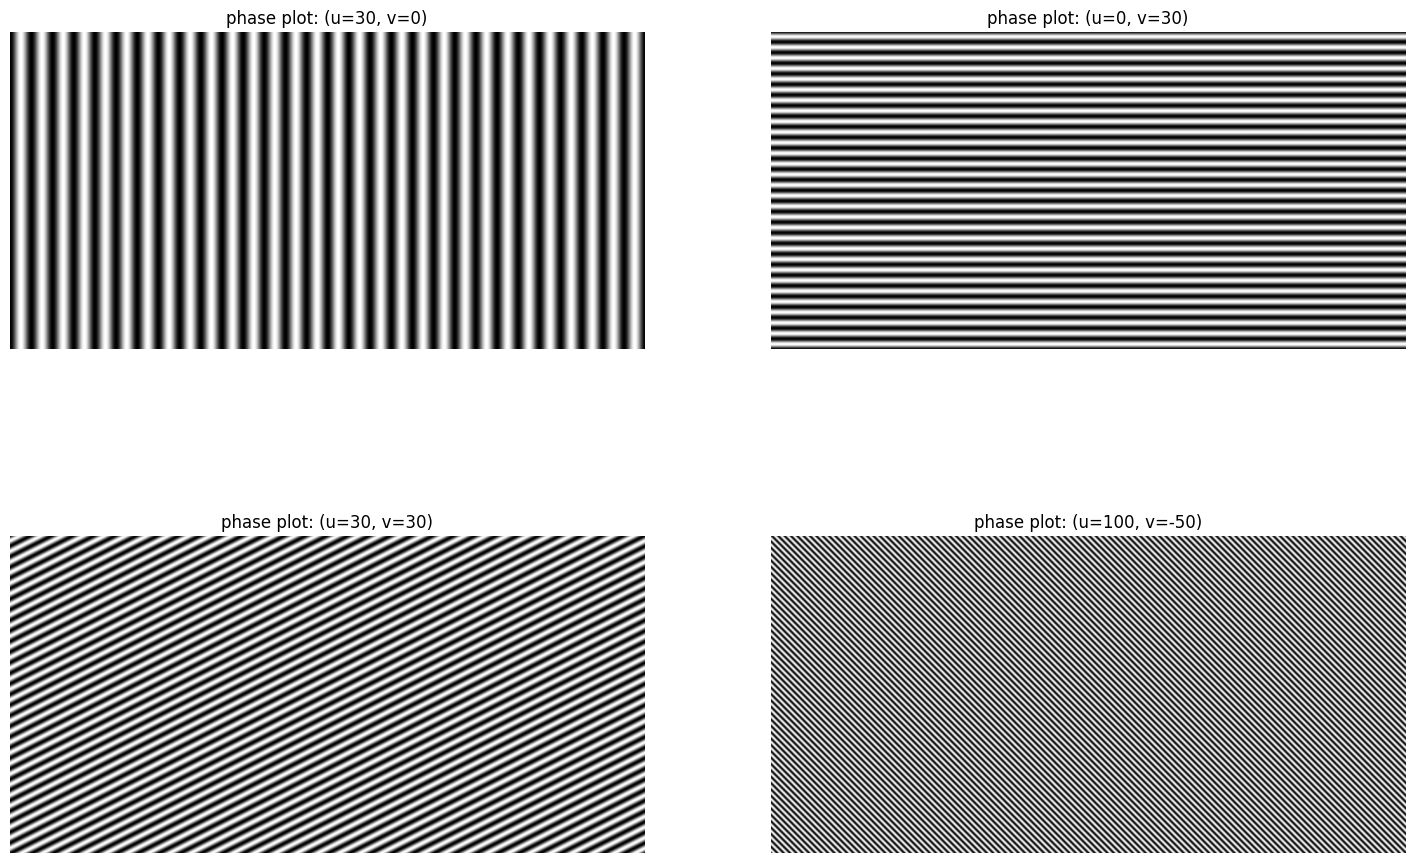

In [5]:
fig2 = plt.figure(2, figsize=[18, 12])
ax_f21 = fig2.add_subplot(2, 2, 1)
ax_f21.imshow(ph_u30_v0, cmap='gray')
ax_f21.set_title(title_u30_v0)
ax_f21.axis('off')

ax_f22 = fig2.add_subplot(2, 2, 2)
ax_f22.imshow(ph_u0_v30, cmap='gray')
ax_f22.set_title(title_u0_v30)
ax_f22.axis('off')

ax_f23 = fig2.add_subplot(2, 2, 3)
ax_f23.imshow(ph_u30_v30, cmap='gray')
ax_f23.set_title(title_u30_v30)
ax_f23.axis('off')

ax_f24 = fig2.add_subplot(2, 2, 4)
ax_f24.imshow(ph_u100_v_m50, cmap='gray')
ax_f24.set_title(title_u100_v_m50)
ax_f24.axis('off');

## A note on the meaning of frequencies $u$ and $v$ in the DFT

Here we consider the basis function of the discrete Fourier transform.

$$
F(u,v) = \frac{1}{N_c \cdot N_r} \sum_{x=0}^{N_c - 1}\sum_{y=0}^{N_r - 1}f(x,y) \cdot exp \left[ -j2\pi \cdot \frac{x\cdot u}{N_c} \right] \cdot exp \left[ -j2\pi \cdot \frac{y\cdot v}{N_r} \right]
$$

The basis function is expressed in procduct form, namely:

$$
exp \left[ -j2\pi \cdot \frac{x\cdot u}{N_c} \right] \cdot exp \left[ -j2\pi \cdot \frac{y\cdot v}{N_r} \right]
$$

Variables $u$ and $v$ are commonly referred to as *frequency* variables.

In the original definition of the DFT these frequency variables are assigned to positive integer values in the range:

$$0 \le u \lt N_c$$

and

$$0 \le v \lt N_r$$

so there are no *negative* frequencies. However from signal processing concepts usage of negative frequencies is fairly commmon. So we intend to use it again for the DFT of a two dimensional signal (eg.: image).

First the basis function with  positive frequencies $u$ and $v$ is equivalently expressed by strictly negative frequencies denoted $u_{(-)}$ and $v_{(-)}$. ($u_{(-)} \lt 0$ and $v_{(-)} \lt 0$)


$$
exp \left[ -j2\pi \cdot \frac{x\cdot u}{N_c} \right] \cdot exp \left[ -j2\pi \cdot \frac{y\cdot v}{N_r} \right] = exp \left[ -j2\pi \cdot \frac{x\cdot u_{(-)}}{N_c} \right] \cdot exp \left[ -j2\pi \cdot \frac{y\cdot v_{(-)}}{N_r} \right]
$$

as a preliminary step we get two equations:

$$
exp \left[ -j2\pi \cdot \frac{x\cdot \left(u-u_{(-)}\right)}{N_c} \right] = 1 
$$


$$
exp \left[ -j2\pi \cdot \frac{y\cdot \left(v-v_{(-)}\right)}{N_r} \right] = 1 
$$

from which we obtain two conditions:

$$
-u_{(-)} = N_c - u
$$

and

$$
-v_{(-)} = N_r - v
$$

Rule 1: If the original frequency $u \lt -u_{(-)}$ the positive frequency variable $u$ is used; otherwise the negative frequency variable $u_{(-)}$ is used in the basis function. For positive frequencies we obtain:

$$u \lt \frac{N_c}{2}$$

The maximum positive frequency $max(u)$ is computed from:

$$
max(u) = \begin{cases}\frac{N_c}{2} -1 & N_c \implies even\\ \frac{N_c - 1}{2} & N_c \implies odd\end{cases}
$$

The minimum negative frequency $min(u_{(-)})$ is:

$$min(u_{(-)}) = -\left(N_c - max(u)\right) + 1$$


Rule 2: If the original frequency $v \lt -v_{(-)}$ the positive frequency variable $v$ is used; otherwise the negative frequency variable $v_{(-)}$ is used in the basis function. For positive frequencies we obtain:

$$v \lt \frac{N_r}{2}$$


The maximum positive frequency $max(v)$ is computed from:

$$
max(v) = \begin{cases}\frac{N_r}{2} -1 & N_r \implies even\\ \frac{N_r - 1}{2} & N_r \implies odd\end{cases}
$$

The minimum negative frequency $min(v{(-)})$ is:

$$min(v{(-)}) = -\left(N_r- max(v)\right) + 1$$


Some examples shall demonstrate these rules for $N_c=500$ and $N_r=301$. The maximum values for positive frequencies are computed like this:

$$max(u) = \frac{500}{2}-1=249$$

$$max(v) = \frac{301-1}{2}=150$$


case 1: $u= 45$ ; positve frequency $u=45$ is used since ($45 \le max(u)=249$).

case 2: $u= 345$ ; negative frequency $u_{(-)}=-155$ is used since ($345 \gt max(u)=249$).

case 3: $v= 150$ ; positve frequency $v=150$ is used since ($150 \le max(v)=150$).

case 4: $v= 230$ ; negative frequency $v_{(-)}=-71$ is used since ($230 \gt max(v)=150$).


An array of positive and negative frequency can be directly obtained using numpy function **fftfreq()**.

The frequency values can be computed like this:

frequencies = fftshift(Nf, d=1/Nf)  ; increment *d* has been conveniently chosen to get integer valued positive and negative frequencies.

Nf denotes the number of frequencies

Examples for Nf = 10 and Nf=11 are given below:

In [6]:
# frequencies for Nf = 10
Nf = 10
frequencies_Nf10 = np.fft.fftfreq(Nf, d=1.0/Nf)

# frequencies for Nf = 11
Nf = 11
frequencies_Nf11 = np.fft.fftfreq(Nf, d=1.0/Nf)

print(f"Nf = 10\nfrequencies:{frequencies_Nf10}\n")
print(f"Nf = 11\nfrequencies:{frequencies_Nf11}\n")

Nf = 10
frequencies:[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]

Nf = 11
frequencies:[ 0.  1.  2.  3.  4.  5. -5. -4. -3. -2. -1.]



## Examples of Fourier transforms

In [7]:
imgFile = "./img/metzgerei_schild_noerdlingen.jpg"
img = cv2.imread(imgFile, cv2.IMREAD_GRAYSCALE)

# transform
img_f = np.fft.fft2(img)
# reorder frequencies
fshift = np.fft.fftshift(img_f)
magnitude_spectrum = 20*np.log10(np.abs(fshift))
# get phase and map to range [0, 255] ; 0: 0° , 255: 360°
phase_spectrum = 255*(np.angle(fshift) + np.pi) / (2*np.pi)

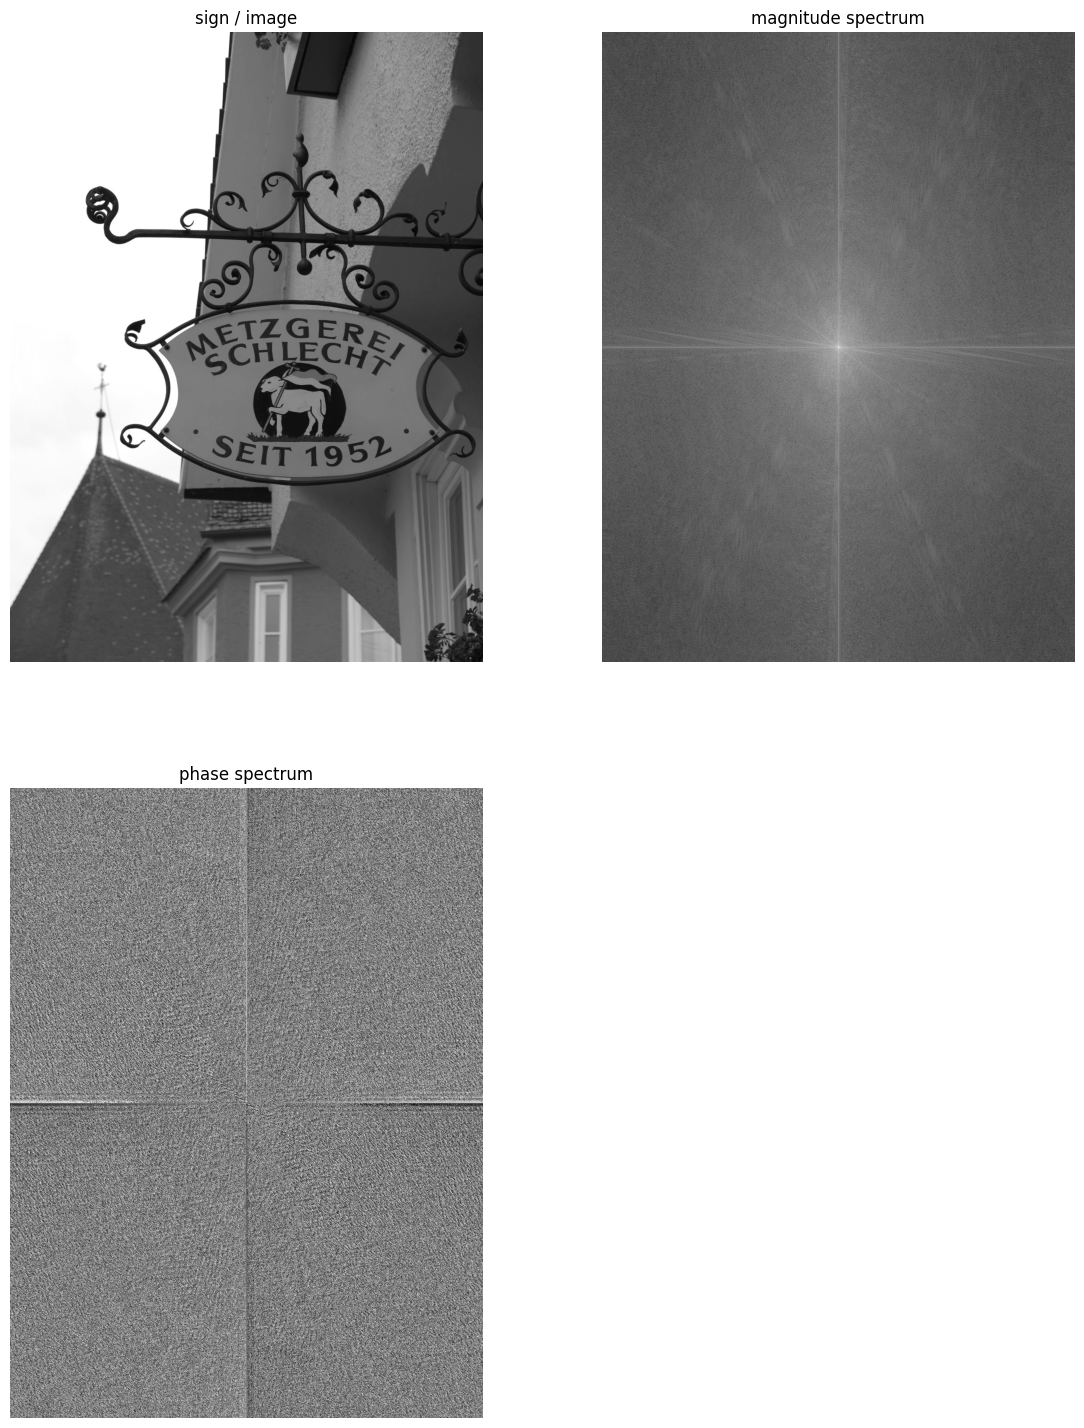

In [8]:
fig3 = plt.figure(3, figsize=[14, 18])

ax_f31 = fig3.add_subplot(2, 2, 1)
ax_f31.imshow(img, cmap='gray')
ax_f31.set_title('sign / image')
ax_f31.axis('off')

ax_f32 = fig3.add_subplot(2, 2, 2)
ax_f32.imshow(magnitude_spectrum, cmap='gray')
ax_f32.set_title('magnitude spectrum')
ax_f32.axis('off')

ax_f33 = fig3.add_subplot(2, 2, 3)
ax_f33.imshow(phase_spectrum, cmap='gray')
ax_f33.set_title('phase spectrum')
ax_f33.axis('off');

## Comments

From the visualisation of magnitude spectrum or phase spectrum it is difficult to relate the spectral properties to the image itself.

In the following section the spectra of images having a more *regular* structure are visualised.

## Other examples of Fourier transforms

test image

In [9]:
img_tst1 = 255 * np.ones((500, 500))
# adding black stripes
img_tst1[140:160, 250:400] = 0
img_tst1[240:260, 100:250] = 0
img_tst1[100:400, 240:260] = 0

# transform
img_tst1_fd = np.fft.fft2(img_tst1)
# reorder frequencies
# magnitude_img_tst1_fd = 20*np.log(np.abs(np.fft.fftshift(img_tst1_fd)) + 1e-20)
magnitude_img_tst1_fd = np.fft.fftshift(20*np.log10(np.abs(img_tst1_fd) + 1e-20))
magnitude_img_tst1_fd = magnitude_img_tst1_fd - np.min(magnitude_img_tst1_fd)
magnitude_img_tst1_fd = 255 * magnitude_img_tst1_fd / np.max(magnitude_img_tst1_fd)

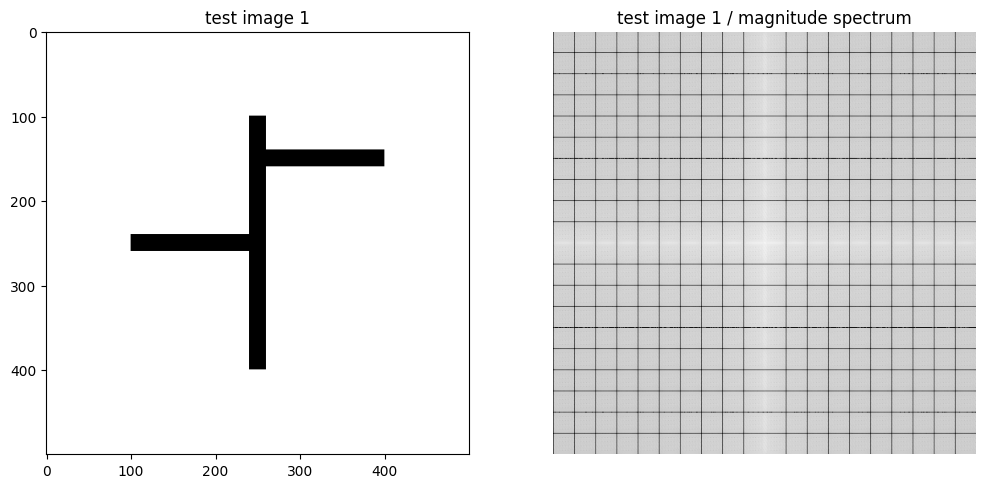

In [10]:
fig4 = plt.figure(4, figsize=[12, 8])
ax_f41 = fig4.add_subplot(1, 2, 1)
ax_f41.imshow(img_tst1, cmap='gray')
ax_f41.set_title('test image 1')
#ax_f41.axis('off')

ax_f42 = fig4.add_subplot(1, 2, 2)
ax_f42.imshow(magnitude_img_tst1_fd, cmap='gray')
ax_f42.set_title('test image 1 / magnitude spectrum')
ax_f42.axis('off');

In [11]:
img_tst2 = 255 * np.ones((500, 500))
# adding black stripes (vertical bars)
img_tst2[:, 100:120] = 0
img_tst2[:, 200:220] = 0
img_tst2[:, 300:320] = 0
img_tst2[:, 400:420] = 0

# transform
img_tst2_fd = np.fft.fft2(img_tst2)
# reorder frequencies
magnitude_img_tst2_fd = np.fft.fftshift(20*np.log10(np.abs(img_tst2_fd) + 1e-20))

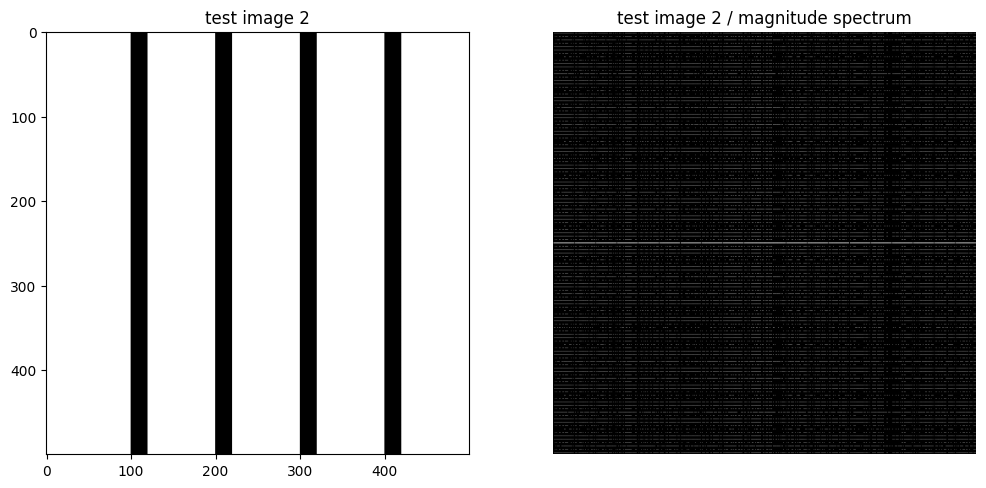

In [12]:
fig5 = plt.figure(5, figsize=[12, 8])
ax_f51= fig5.add_subplot(1, 2, 1)
ax_f51.imshow(img_tst2, cmap='gray')
ax_f51.set_title('test image 2')

ax_f52 = fig5.add_subplot(1, 2, 2)
ax_f52.imshow(magnitude_img_tst2_fd, cmap='gray')
ax_f52.set_title('test image 2 / magnitude spectrum')
ax_f52.axis('off');

Text(0.5, 1.0, 'image after backtransform')

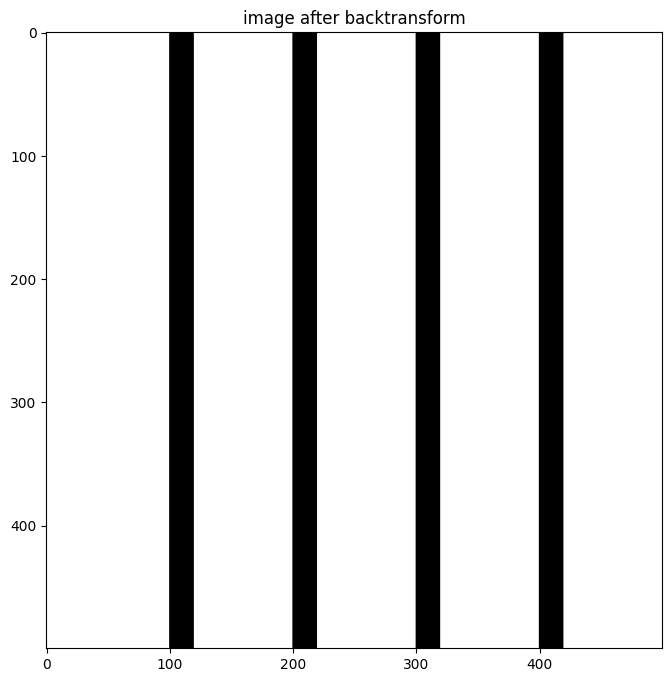

In [13]:
# transforming back into the image domain

img_tst2_back = np.real(np.fft.ifft2(img_tst2_fd))

fig6 = plt.figure(6, figsize=[12, 8])
ax_f61 = fig6.add_subplot(1, 1, 1)
ax_f61.imshow(img_tst2_back, cmap='gray')
ax_f61.set_title('image after backtransform')
#ax_f61.axis('off');

In [14]:
(np.min(img_tst2_back), np.max(img_tst2_back))

(-6.424650478604276e-14, 255.00000000000009)

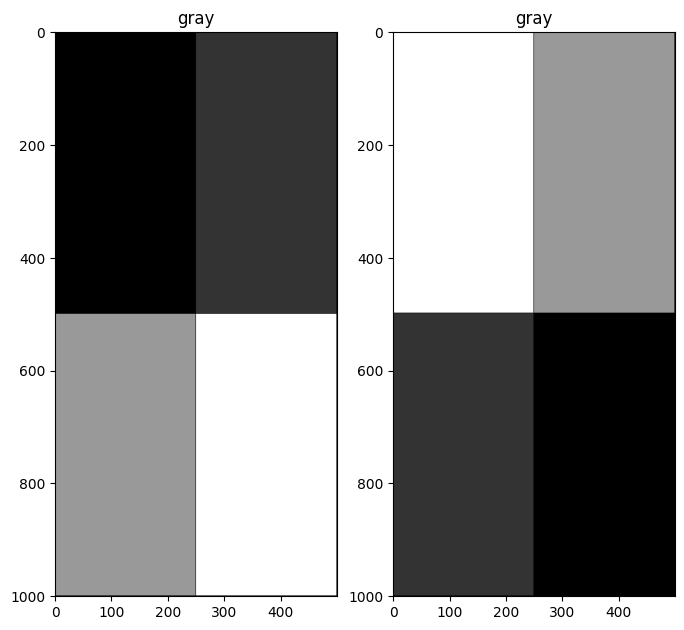

In [15]:
N_c = 500
N_r = 1001

u_max = N_c//2 - 1
v_max = (N_r - 1)//2

img_gray = np.ones((N_r, N_c), dtype=np.uint8)

img_gray[0:v_max, 0:u_max] = 0
img_gray[0:v_max, (u_max+1):(N_c - 1)] = 50
img_gray[(v_max+1):(N_r-1), 0:u_max] = 150
img_gray[(v_max+1):(N_r-1), (u_max+1):(N_c - 1)] = 250

img_gray_fftshift = np.fft.fftshift(img_gray)

fig7 = plt.figure(7, figsize=[8, 8])
ax_f71 = fig7.add_subplot(1, 2, 1)
ax_f71.imshow(img_gray, cmap='gray')
ax_f71.set_title('gray')

ax_f72 = fig7.add_subplot(1, 2, 2)
ax_f72.imshow(img_gray_fftshift, cmap='gray')
ax_f72.set_title('gray');

In [16]:
ax_f71.get_xticks()

array([-100.,    0.,  100.,  200.,  300.,  400.,  500.])